<a href="https://colab.research.google.com/github/rlawogjs96/deeplearningnlp_starters/blob/main/Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Preprocessing

**1.1 Tokenizer**

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer() 
train_text = "The one who succeeds will prove the stronger" 

tokenizer.fit_on_texts([train_text])

sub_text = "The one who succeeds will strive to be the stronger" 
sequences = tokenizer.texts_to_sequences([sub_text])[0]

print("Encoding :", sequences)
print("Set of words: ", tokenizer.word_index)

Encoding : [1, 2, 3, 4, 5, 1, 7]
Set of words:  {'the': 1, 'one': 2, 'who': 3, 'succeeds': 4, 'will': 5, 'prove': 6, 'stronger': 7}


'to', 'be', are not printed since it is not in the vocabulary set

**1.2 pad_sequence()** : use padding in order to make different sample lengths in unison. In order for samples to be inputs for our models, there are cases in which we have to unify the sample lengths. 

In [ ]:
pad_sequences([[1,2,3],[3,5,7,9],[1,3]], maxlen = 3, padding = 'pre') # pre or post

array([[1, 2, 3],
       [5, 7, 9],
       [0, 1, 3]], dtype=int32)

# 2. Word Embedding

Create words within the text into dense vectors. The process of transforming words into dense vectors is called **word embedding**.

Embedding() takes in a 2D tensor as input. (number_of_samples, input_length)
Embedding() returns a 3D tensor as output. (number_of_samples, input_length, embedding_word_dimensionality)

In [ ]:
# WARNING: This pseudocode is to help us understand the logic of Embedding, not actual running code. 
from keras.layers import Embedding

# 1. Tokenize
tokenized_text = [['Hope', 'to', 'see', 'you', 'soon'], ['Nice', 'to', 'see', 'you', 'again']]

# 2. Integer Embedding for each word 
encoded_text = [[0, 1, 2, 3, 4],[5, 1, 2, 3, 6]]

# 3. The data from Integer Embedding becomes the input for Embedding Layer. 
vocab_size = 7
embedding_dim = 2
Embedding(vocab_size, embedding_dim, input_length=5)

# 3. Modeling



**3.1 Sequential()**
Used by Keras to formulate input layer, hidden layer, output layer. 

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential() 
# model.add(Embedding(vocab_size,output_dim,input_length)) -> add embedding layer 
# model.add(Dense(1, input_dim = 3, activation = 'relu')) -> add fully-connected layer 
               # ***DENSE*** 
               # first factor : number of neurons in output layer
               # input_dim : number of neurons in input layer, input dimension
               # activation : activation function. (linear, sigmoid, softmax, relu)

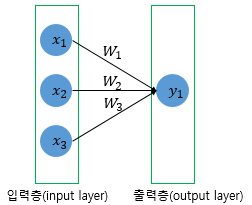

In [ ]:
# Additional fully-connected layer
model = Sequential() 
model.add(Dense(8, input_dim=4, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid')) # Output layer

In [ ]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 40        
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 49
Trainable params: 49
Non-trainable params: 0
_________________________________________________________________


# 4. Compile and Training

**4.1 compile()**

loss function, optimizer, metric function

In [ ]:
from tensorflow.keras.layers import SimpleRNN, Embedding, Dense
from tensorflow.keras.models import Sequential 

vocab_size = 10000
embedding_dim = 32
hidden_units = 32

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim)) 
model.add(SimpleRNN(hidden_units)) 
model.add(Dense(1, activation = 'sigmoid')) 
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['acc'])

**4.2**

**fit()** : Trains the model, main objective is to find the right fitting through training. 

**X_train()** : training set. 

**Y_train()** : Label data in Supervised Learning. 

**epochs** : Total number of trainings. Goes through entire data. 

**batch_size** : Batch Size. Default value = 32. batch_size = None when mini batch gradient descent is not to be used. 

**validation_data(x_val,y_val)** : Uses validation data.

**validation_split** : Uses partial training data as validation data.



In [ ]:
# 위의 compile() 코드의 연장선상인 코드
model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0, validation_data(X_val, y_val))
model.fit(X_train, y_train, epochs=10,batch_size=32, verbose=0, validation_split=0.2))

# 5. Evaluation and Prediction

**5.1** 

**evaluate() :** 
Evaluates accuracy using test data.

**predict() :**
Predicts model's output value based on input.

In [ ]:
model.evaluate(X_test, y_test, batch_size = 32)
model.predict(X_input,batch_size = 32)

# 6. Save and Load

**save() :**

saves neural network model

**load_model() :** 
loads model

In [ ]:
model.save("model.name.h5")
from tensorflow.keras.models import load model
model = load_model("model_name.h5")